# 2022/01/08 check the dataset

#### Aim
check the dataset

#### add the path

In [2]:
import pathlib
from pathlib import Path

current_dir: Path = pathlib.Path().cwd().resolve()
project_root: Path = current_dir.parent
data_dir: Path = project_root / "data"

#### get audio data

In [3]:
audio_dir: Path = data_dir / "train" / "audio"
audio_file1: Path = audio_dir / "000000.wav"

In [4]:
audio_file1.exists()

True

#### visualize audio data

In [5]:
from typing import Tuple
import torch, torchaudio


def load_wav(path:  pathlib.Path) -> Tuple[torch.Tensor, int]:
    return torchaudio.load(path)


audio_input, sample_rate = load_wav(audio_file1)


Shape of audio_input: torch.Size([8, 291576])
Sample rate of audio_input: 44100


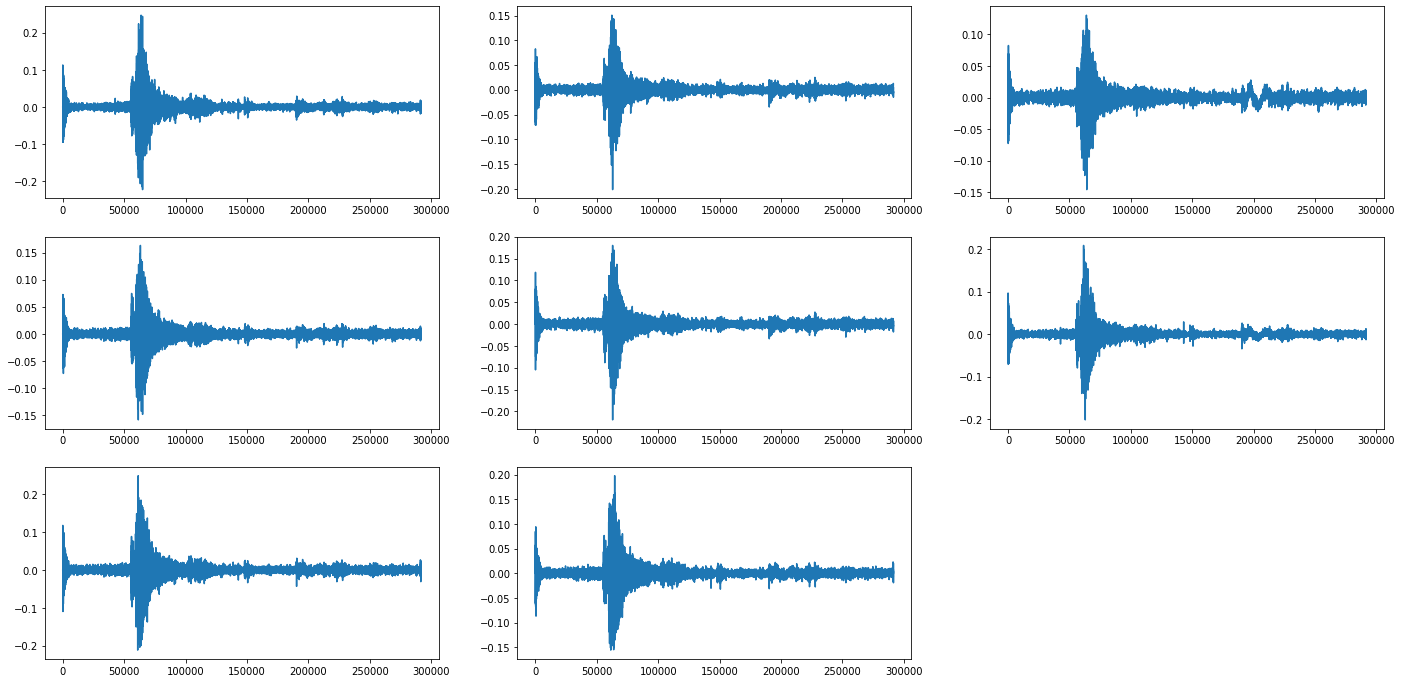

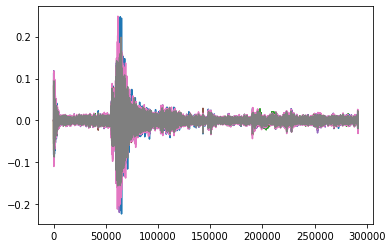

In [6]:
import matplotlib.pyplot as plt


print(f"Shape of audio_input: {audio_input.size()}")
print(f"Sample rate of audio_input: {sample_rate}")

plt.figure(figsize=[24, 12])
for i in range(audio_input.size()[0]):
    plt.subplot(3, 3, i + 1)
    plt.plot(audio_input[i].numpy())

plt.figure()
plt.plot(audio_input.t().numpy())
plt.show()


In [7]:
from IPython import display


display.Audio(audio_file1)

Shape of spectrogram: torch.Size([8, 128, 570])


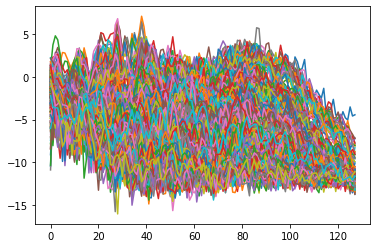

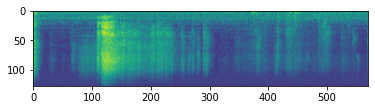

In [18]:
def get_mel_spectrogram(wave_form: torch.Tensor, sample_rate: int) -> torch.Tensor:
    n_fft = 1024
    win_length = None
    hop_length = 512
    n_mels = 128
    # n_mels = 64

    return torchaudio.transforms.MelSpectrogram(
        # sample_rate=sample_rate,
        n_fft=n_fft,
        # win_length=win_length,
        # hop_length=hop_length,
        # center=True,
        # pad_mode="reflect",
        # power=2.0,
        # norm='slaney',
        # onesided=True,
        # n_mels=n_mels,
    )(wave_form)



print(f"Shape of spectrogram: {get_mel_spectrogram(audio_input, sample_rate).size()}")

plt.figure()
plt.plot(get_mel_spectrogram(audio_input, sample_rate).log2()[0].numpy())
plt.figure()
plt.imshow(get_mel_spectrogram(audio_input, sample_rate).log2()[0].numpy())
plt.show()


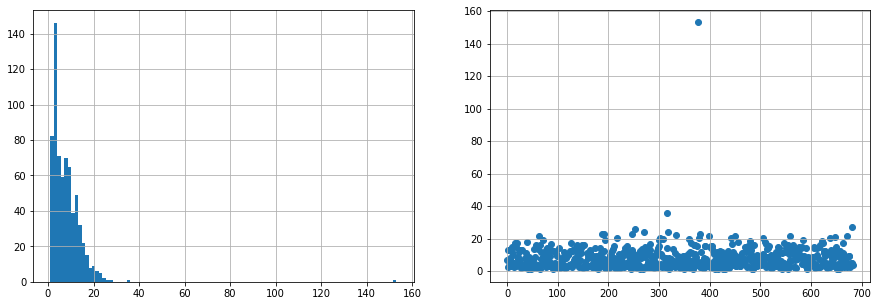

In [9]:
from typing import List, Tuple

wav_files: List[Path] = sorted(list(audio_dir.glob("*.wav")))
wavs: List[Tuple[torch.Tensor, int]] = [
    load_wav(path) for path in wav_files
]
sound_lengths: List[float] = [
    float(wav[0].size()[1] / wav[1]) for wav in wavs
]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(sound_lengths, bins=100)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x=list(range(len(sound_lengths))), y=sound_lengths)
plt.grid(True)
plt.show()

In [10]:
from typing import List, Tuple

too_long_data: List[Tuple[int, float]] = [
    (
        idx,
        seconds,
    ) for idx, seconds in enumerate(sound_lengths) if seconds > 30
]

print(too_long_data)


[(315, 35.99569160997732), (377, 153.03668934240363)]


`000377.wav` is very long. Isn't it anomaly?  
-> yes.